Decision Tree

Tiatnic Survival Dataset

In [1]:
#Import the Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
#Load the data sets- train and test 
df=pd.read_csv('train_titanic.csv')

X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = df["Survived"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [3]:
#Look at top values of train data 
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [4]:
#Print the column names of train data
cl=X_train.columns
print(cl)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


In [5]:
#Print the dimension of train and test data
train=X_train.shape
test=X_test.shape
print(train)
print(test)

(712, 7)
(179, 7)


In [6]:
#Print the number of missing values in each column of train and test data

trnull=X_train.isnull().sum()
#tsnull=X_test.isnull.sum()
print("train",trnull)
#print("test",tsnull)

train Pclass        0
Sex           0
Age         140
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


## Data Visualization

/tmp/ipykernel_7278/4141208992.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(embarked_counts)


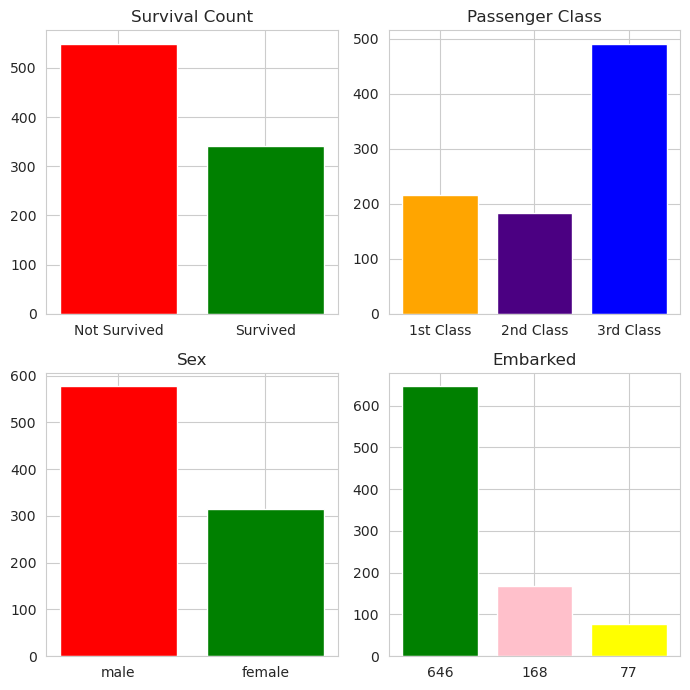

In [26]:
#Barchart of Survived, Pclass, Sex, Embarked
import matplotlib.pyplot as plt

#plt.bar(df['Survived'],df['Pclass'],df['Embarked'].value_counts())
# Set figure size
fig, axes = plt.subplots(2, 2, figsize=(7, 7))


survived_counts = df["Survived"].value_counts()
axes[0,0].bar(survived_counts.index, survived_counts.values, color=['red', 'green'])
axes[0,0].set_title("Survival Count")
axes[0,0].set_xticks([0, 1])
axes[0,0].set_xticklabels(["Not Survived", "Survived"])

pclass_counts = df["Pclass"].value_counts()
axes[0,1].bar(pclass_counts.index, pclass_counts.values, color=['blue', 'orange', 'indigo'])
axes[0,1].set_title("Passenger Class")
axes[0,1].set_xticks([1, 2, 3])
axes[0,1].set_xticklabels(["1st Class", "2nd Class", "3rd Class"])


gender = df["Sex"].value_counts()
axes[1,0].bar(gender.index, gender.values, color=['red', 'green'])
axes[1,0].set_title("Sex")
axes[1,0].set_xticks([0, 1])
axes[1,0].set_xticklabels(gender.index)


embarked_counts = df["Embarked"].value_counts()
axes[1,1].bar(embarked_counts.index, embarked_counts.values, color=['green', 'pink', 'yellow'])
axes[1,1].set_title("Embarked")
axes[1,1].set_xticklabels(embarked_counts.index)

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
#Histogram of Age, Parch, Fare

ValueError: `bins` must increase monotonically, when an array

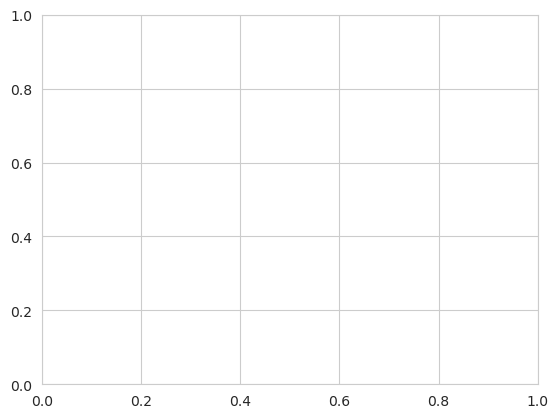

In [27]:
#Plot histogram of age for survived and did not survived class
plt.hist(df['Age'],df['Survived'])
import matplotlib.pyplot as plt

# Create histogram for Age based on Survived status
plt.figure(figsize=(10, 5))

# Histogram for passengers who did NOT survive
plt.hist(df[df["Survived"] == 0]["Age"], bins=30, alpha=0.5, label="Did Not Survive", color="red")

# Histogram for passengers who DID survive
plt.hist(df[df["Survived"] == 1]["Age"], bins=30, alpha=0.5, label="Survived", color="green")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution for Survived vs Did Not Survive")
plt.legend()

# Show plot
plt.show()


In [10]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers

In [11]:
#Histogram of Age of the given data set(sample)

## Handling Missing Values

In [12]:
#Replace the msiing values in Embarked column by 'S'
df["Embarked"].fillna("S", inplace=True)
print(df['Embarked'])


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


/tmp/ipykernel_6702/225914260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna("S", inplace=True)


In [13]:
#Impute the missing values in Fare column with median value
df["Fare"].fillna(df["Fare"].median(), inplace=True)
df['Fare']



/tmp/ipykernel_6702/2691010767.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(df["Fare"].median(), inplace=True)


0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [14]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Feature Engineering - Creating new features

In [15]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
df["Family_size"]=df['Parch']+df['SibSp']+1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [16]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
df["IsAlone"]=df['Family_size']==1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True


## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [17]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
df["HasCabin"]=df["Cabin"].notna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,IsAlone,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True,False


## Model Building

In [24]:
#Prepare X and y

In [ ]:
# Label encoding of categorical features


In [ ]:
# concat df_categorical with original df

In [ ]:
#Do a pairplot of all features

In [1]:
X

NameError: name 'X' is not defined

In [30]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = df["Survived"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [31]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier(max_depth=3)

NameError: name 'DecisionTreeClassifier' is not defined

In [21]:
X_train = pd.get_dummies(X_train, drop_first=True)

NameError: name 'X_train' is not defined

In [22]:
X_test = pd.get_dummies(X_test, drop_first=True)

NameError: name 'X_test' is not defined

In [23]:
model.fit(X_train, y_train)

NameError: name 'model' is not defined

In [43]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0]


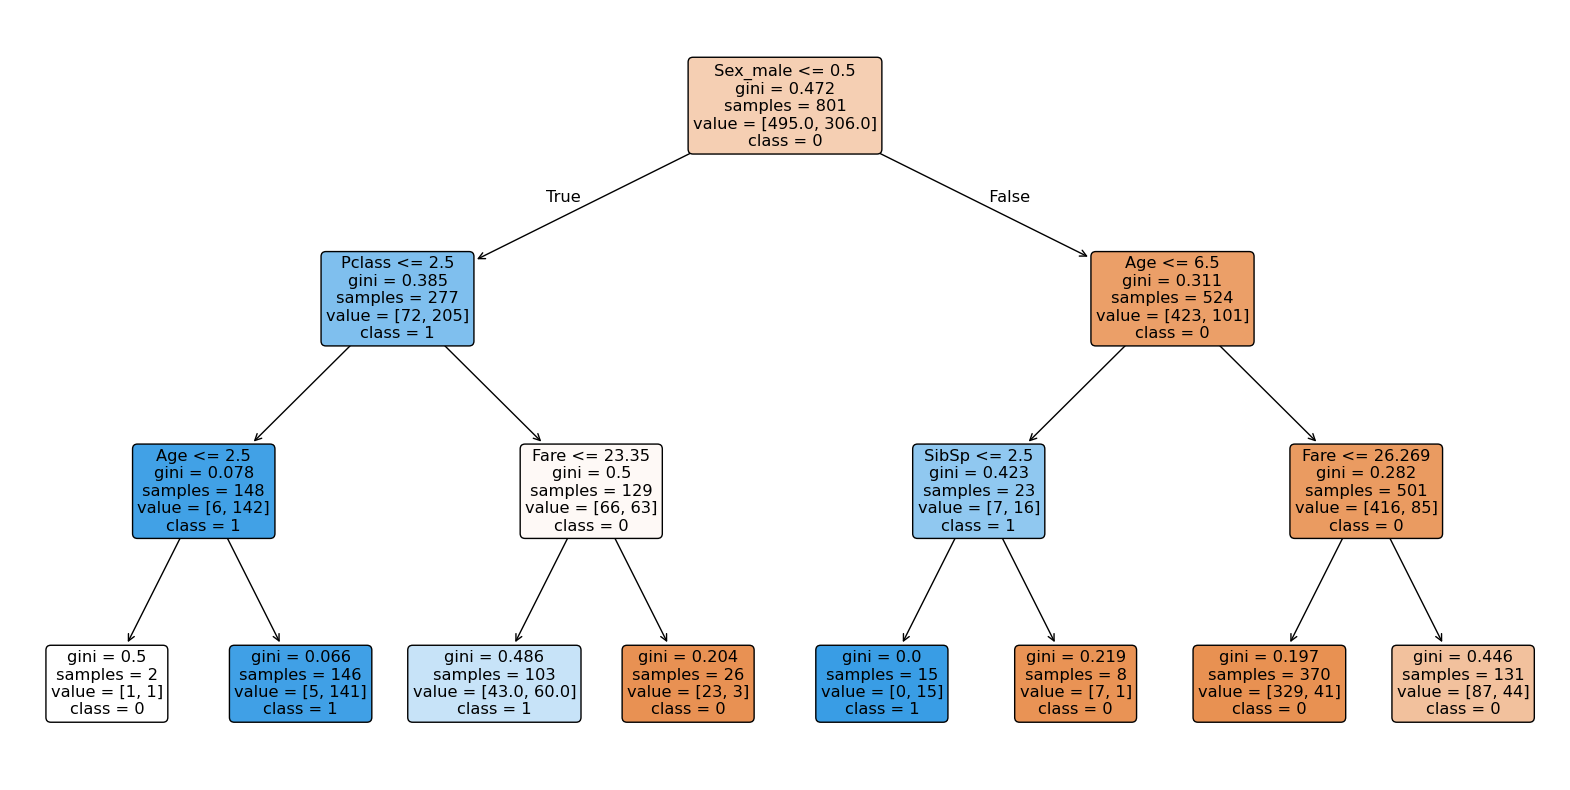

In [44]:
#Print the tree

# Importing required packages for visualization
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    model, 
    feature_names=X_train.columns, 
    class_names=model.classes_.astype(str),
    filled=True, 
    rounded=True
)
plt.show()


In [46]:
y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score 
acc = accuracy_score(y_test, y_pred)
acc

0.8222222222222222

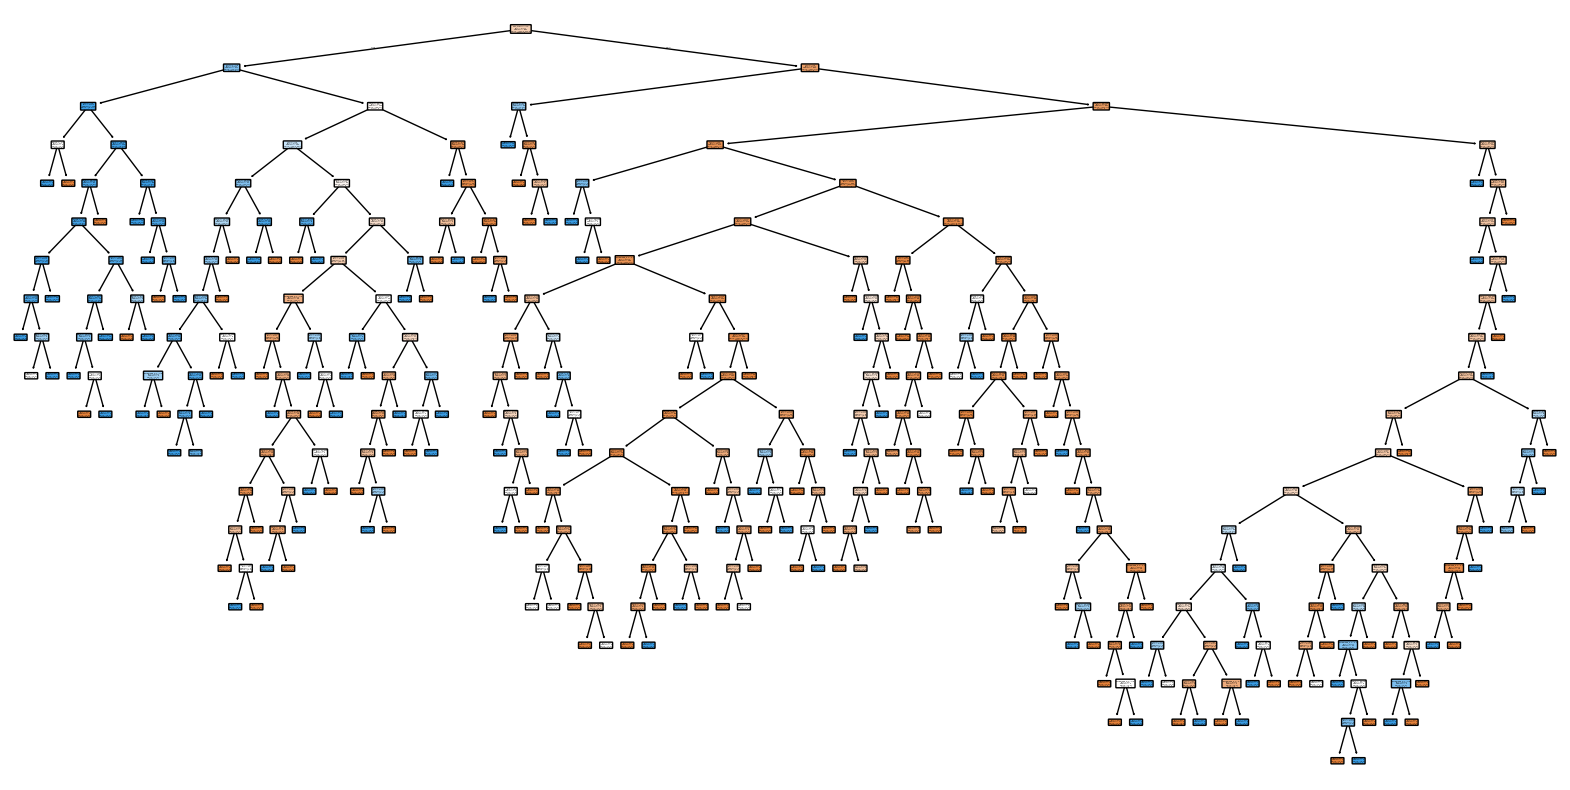

In [38]:
# plotting tree with max_depth=3
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X_train.columns,
    class_names=model.classes_.astype(str),
    filled=True,
    rounded=True
)
plt.show()

<img src="tree2.png">

In [ ]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

In [ ]:
# Printing confusion matrix and accuracy